# Liner Regration
## Steps and Code Implementation:
### Step 1: Generate Linear Data
Use NumPy to generate synthetic linear data with some added noise:

In [1]:
import numpy as np
np.random.seed(42)  # for reproducibility

# Number of instances
m = 100

# Generate random features (X) and target variable (y)
X = 2 * np.random.rand(m, 1)  # feature column
y = 4 + 3 * X + np.random.randn(m, 1)  # target with noise


Step 2: Compute  using the Normal Equation
Use NumPy to implement the Normal Equation and calculate the best


In [2]:
from sklearn.preprocessing import add_dummy_feature
from numpy.linalg import inv

# Add x0 = 1 to each instance (for the bias term)
X_b = add_dummy_feature(X)

# Compute theta_best using the Normal Equation
theta_best = inv(X_b.T @ X_b) @ X_b.T @ y

# Output the result
print(theta_best)


[[4.21509616]
 [2.77011339]]


Step 3: Make Predictions
Now, use the calculated
𝜃
 to make predictions for new data points:

In [3]:
# Define new instances for which we want predictions
X_new = np.array([[0], [2]])

# Add the bias term (x0 = 1)
X_new_b = add_dummy_feature(X_new)

# Predict values using the learned parameters (theta_best)
y_predict = X_new_b @ theta_best

print(y_predict)


[[4.21509616]
 [9.75532293]]


Step 4: Plot Predictions
Visualize the results with Matplotlib:

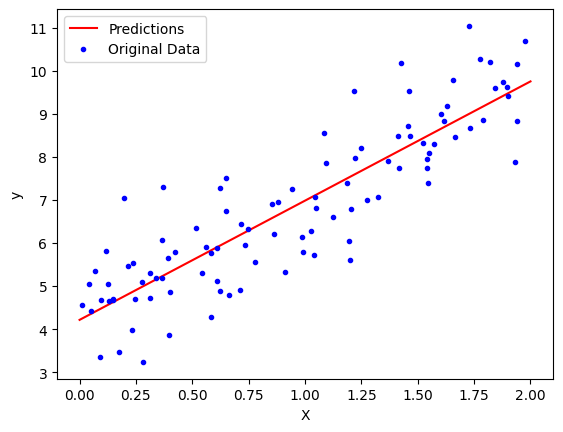

In [4]:
import matplotlib.pyplot as plt

# Plot the predictions and original data
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Step 5: Perform Linear Regression using Scikit-Learn
Using Scikit-Learn’s LinearRegression class simplifies the process:

In [5]:
from sklearn.linear_model import LinearRegression

# Train the model using Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Get the intercept and coefficient
print(lin_reg.intercept_, lin_reg.coef_)

# Predict the same new values
y_predict_sklearn = lin_reg.predict(X_new)
print(y_predict_sklearn)


[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


Step 6: Using the Pseudoinverse with SVD
You can also use the pseudoinverse approach to compute
𝜃
:

In [6]:
from numpy.linalg import pinv

# Compute theta_best using the pseudoinverse
theta_best_svd = pinv(X_b) @ y

print(theta_best_svd)


[[4.21509616]
 [2.77011339]]


# Gradient descent algorithm in Python using NumPy

In [8]:
import numpy as np

# Generate sample data
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # feature
y = 4 + 3 * X + np.random.randn(m, 1)  # target with some noise

# Add bias term (intercept)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

# Hyperparameters
eta = 0.1  # learning rate
n_epochs = 1000  # number of epochs

# Initialize parameters (theta) randomly
theta = np.random.randn(2, 1)  # two parameters (intercept and slope)

# Batch Gradient Descent
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # compute gradients
    theta = theta - eta * gradients  # update parameters

# Display the resulting parameters
print("Theta found by gradient descent:", theta)


Theta found by gradient descent: [[4.21509616]
 [2.77011339]]


## Stochastic Gradient Descent (SGD)
Definition: SGD updates the model parameters using only one randomly selected instance from the training set for each iteration, making it faster than batch gradient descent.

In [9]:
import numpy as np

# Generate sample data
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # feature
y = 4 + 3 * X + np.random.randn(m, 1)  # target with some noise

# Add bias term (intercept)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

# Hyperparameters
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

# Initialize parameters (theta) randomly
theta = np.random.randn(2, 1)  # random initialization

# Stochastic Gradient Descent
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # no division by m for SGD
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

print("Theta found by stochastic gradient descent:", theta)


Theta found by stochastic gradient descent: [[4.19000137]
 [2.73381258]]


## Mini-Batch Gradient Descent
Definition: Mini-batch GD computes gradients using small random subsets of the training set called mini-batches, striking a balance between batch and stochastic gradient descent.

In [10]:
import numpy as np

# Generate sample data
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # feature
y = 4 + 3 * X + np.random.randn(m, 1)  # target with some noise

# Add bias term (intercept)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

# Hyperparameters
n_epochs = 50
batch_size = 20  # size of mini-batch
learning_rate = 0.01

# Initialize parameters (theta) randomly
theta = np.random.randn(2, 1)  # random initialization

# Mini-Batch Gradient Descent
for epoch in range(n_epochs):
    indices = np.random.permutation(m)  # shuffle indices
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]

    for i in range(0, m, batch_size):
        X_b_mini_batch = X_b_shuffled[i:i + batch_size]
        y_mini_batch = y_shuffled[i:i + batch_size]

        gradients = 2 / batch_size * X_b_mini_batch.T @ (X_b_mini_batch @ theta - y_mini_batch)
        theta = theta - learning_rate * gradients

print("Theta found by mini-batch gradient descent:", theta)


Theta found by mini-batch gradient descent: [[3.48490084]
 [3.41447116]]


# linear and polynomial regression models using Scikit-Learn:

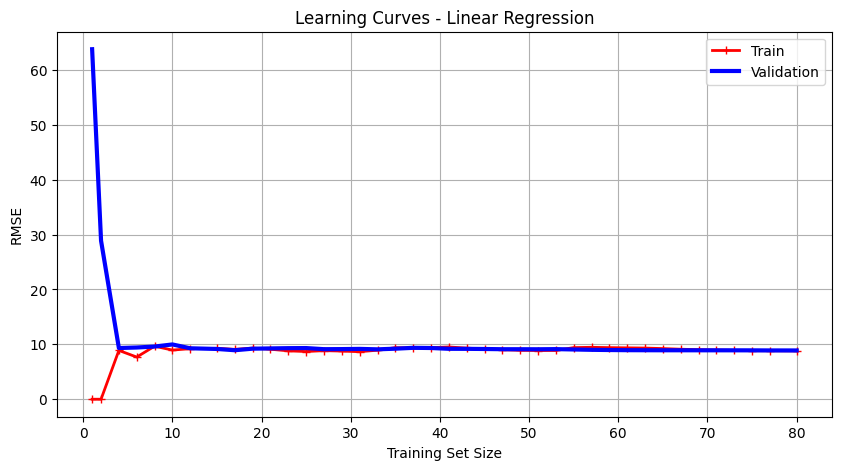

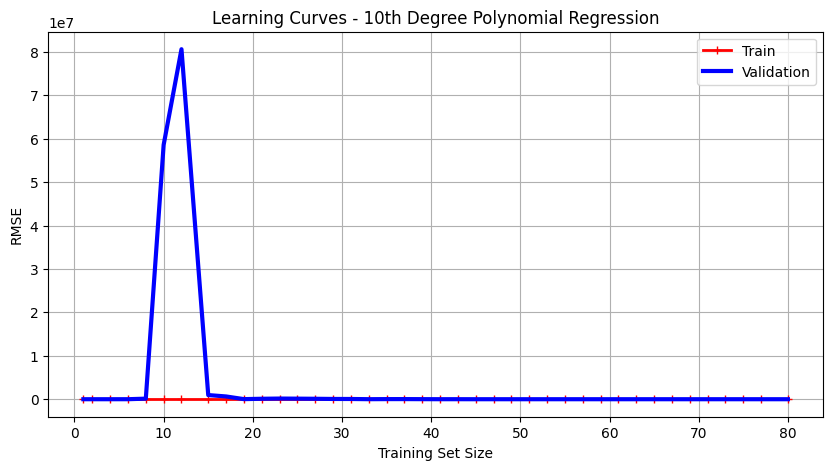

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
train_sizes, train_scores, valid_scores = learning_curve(
    linear_model, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plotting Learning Curves for Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation")
plt.title("Learning Curves - Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

# Polynomial Regression Model (10th degree)
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plotting Learning Curves for Polynomial Regression
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation")
plt.title("Learning Curves - 10th Degree Polynomial Regression")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


# Regularized Linear Models

Regularized linear models help reduce overfitting by constraining the model's complexity. Three common regularization techniques are **Ridge Regression**, **Lasso Regression**, and **Elastic Net Regression**.

## Ridge Regression



In [12]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([67.73369176])

## Gradient Descent Implementation:

Using stochastic gradient descent with L2 regularization:

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([67.74153191])

## Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([67.62444619])

In [15]:
#Stochastic Gradient Descent with L1 Regularization
sgd_reg_lasso = SGDRegressor(penalty="l1", alpha=0.1)
sgd_reg_lasso.fit(X, y.ravel())
sgd_reg_lasso.predict([[1.5]])


array([67.54740143])

In [16]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([63.61588587])

# Logistic Regression
## Training a Logistic Regression Model
Next, we’ll split the data and train a logistic regression model on the training set. Here’s the implementation using the Iris dataset:

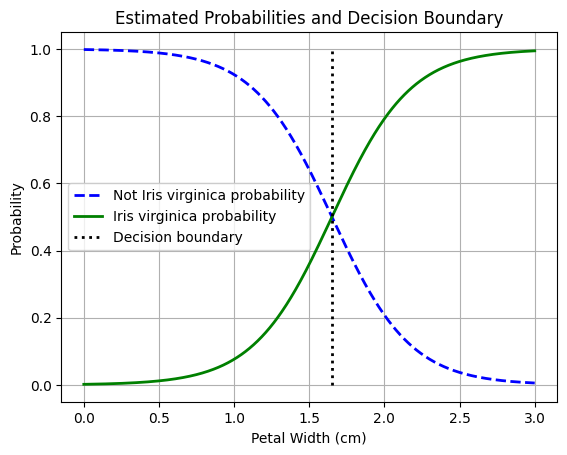

Decision boundary: 1.6516516516516517
Predictions for petal widths of 1.7 and 1.5 cm: [ True False]


In [18]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()

# Selecting the appropriate feature (petal width) using numerical index
X = iris.data[:, 3].reshape(-1, 1)  # 3 corresponds to "petal width (cm)"
y = iris.target_names[iris.target] == 'virginica'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Model's estimated probabilities for petal widths varying from 0 cm to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # Reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)

# Decision boundary
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

# Plotting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica probability")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica probability")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.title("Estimated Probabilities and Decision Boundary")
plt.legend()
plt.grid()
plt.show()

# Displaying the decision boundary
print("Decision boundary:", decision_boundary)
print("Predictions for petal widths of 1.7 and 1.5 cm:", log_reg.predict([[1.7], [1.5]]))


## Implementing Softmax Regression
Here's how to implement softmax regression with the Iris dataset:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Predicted class for petal length 5 cm and width 2 cm: [2]
Predicted probabilities: [[0.   0.04 0.96]]


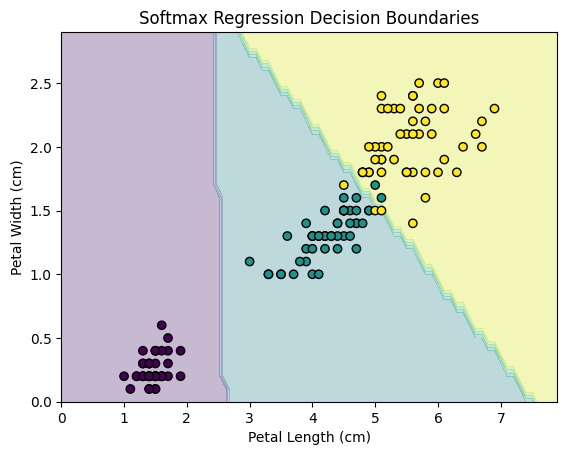

In [20]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()

# Prepare the dataset for softmax regression
# Use numerical indices for "petal length (cm)" (index 2) and "petal width (cm)" (index 3)
X = iris.data[:, [2, 3]]  # Selecting petal length and petal width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Softmax Regression model using Logistic Regression with multiple classes
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

# Predicting class and probabilities for a flower with 5 cm petal length and 2 cm petal width
print("Predicted class for petal length 5 cm and width 2 cm:", softmax_reg.predict([[5, 2]]))
print("Predicted probabilities:", softmax_reg.predict_proba([[5, 2]]).round(2))

# Visualizing decision boundaries
# Create a grid to plot the decision boundaries
xx, yy = np.meshgrid(np.arange(0, 8, 0.1), np.arange(0, 3, 0.1))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Softmax Regression Decision Boundaries")
plt.show()
